<a href="https://colab.research.google.com/github/FilipdeTillier/SAD-project/blob/main/Filip_2_07_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wprowadzenie:

Analiza składa się z 2 zbiorów danych. Dane te przedstawiaja statystykich dwóch duzych platform
streamingowych, Netflix oraz Disney+.

Linki do datasetów:

Netflix: https://www.kaggle.com/datasets/shivamb/netflix-shows

Disney: https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows

Pytania badawcze

Zadaniem jakie chcemy sie podjac jest
wizualizacja oraz analiza danych znajdujących się w poprzednio wymienionych datasetach, między innymi:
- jakie gatunki dominują?
- czy na platformie dominuja stare czy nowe produkcje?
- jaki jest rozkład treści, w podziale na kategorie wiekowe?

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

netflix_path = kagglehub.dataset_download("shivamb/netflix-shows")
disney_path = kagglehub.dataset_download("shivamb/disney-movies-and-tv-shows")

netflix_ds = pd.read_csv(netflix_path + '/netflix_titles.csv')
disney_ds = pd.read_csv(disney_path + '/disney_plus_titles.csv')

columns_to_drop = ['description']

netflix_ds.drop(columns=columns_to_drop, inplace=True)
disney_ds.drop(columns=columns_to_drop, inplace=True)

netflix_ds

100%|██████████| 131k/131k [00:00<00:00, 65.3MB/s]

Extracting files...


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


# Czyszczenie i porządkowanie danych

## Analiza brakujących danych

W celu analizy brakujących danych w naszych datasetach, wygenerujemy 2 wykresy które przedstawią macierz brakujących danych.

Z poniższych wykresów, mozna wywnioskować następujące wnioski.

Netflix:
*   director - braki na poziomie 30%
*   country - wartość 9%
*   cast - wartość 9%
*   added_date, rating, duration - wartości poniżej 1%

Disney:
*   director - braki na poziomie 33%
*   cast - 12%
*   country - 15%
*   date_added, rating - wartości poniżej 1%


Brakujące wartości dla director i country czy też cast są na tyle duże, że trzeba te braki wypełnić, aby zwiększyć jakość naszego dataset'u.

Szczegółowe informacje na temat braków na platformie Netflix [%].
show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
dtype: float64
Szczegółowe informacje na temat braków na platformie Disney [%].
show_id          0.000000
type             0.000000
title            0.000000
director        32.620690
cast            13.103448
country         15.103448
date_added       0.206897
release_year     0.000000
rating           0.206897
duration         0.000000
listed_in        0.000000
dtype: float64


Text(0.5, 1.0, 'Heatmapa korelacji braków - Disney')

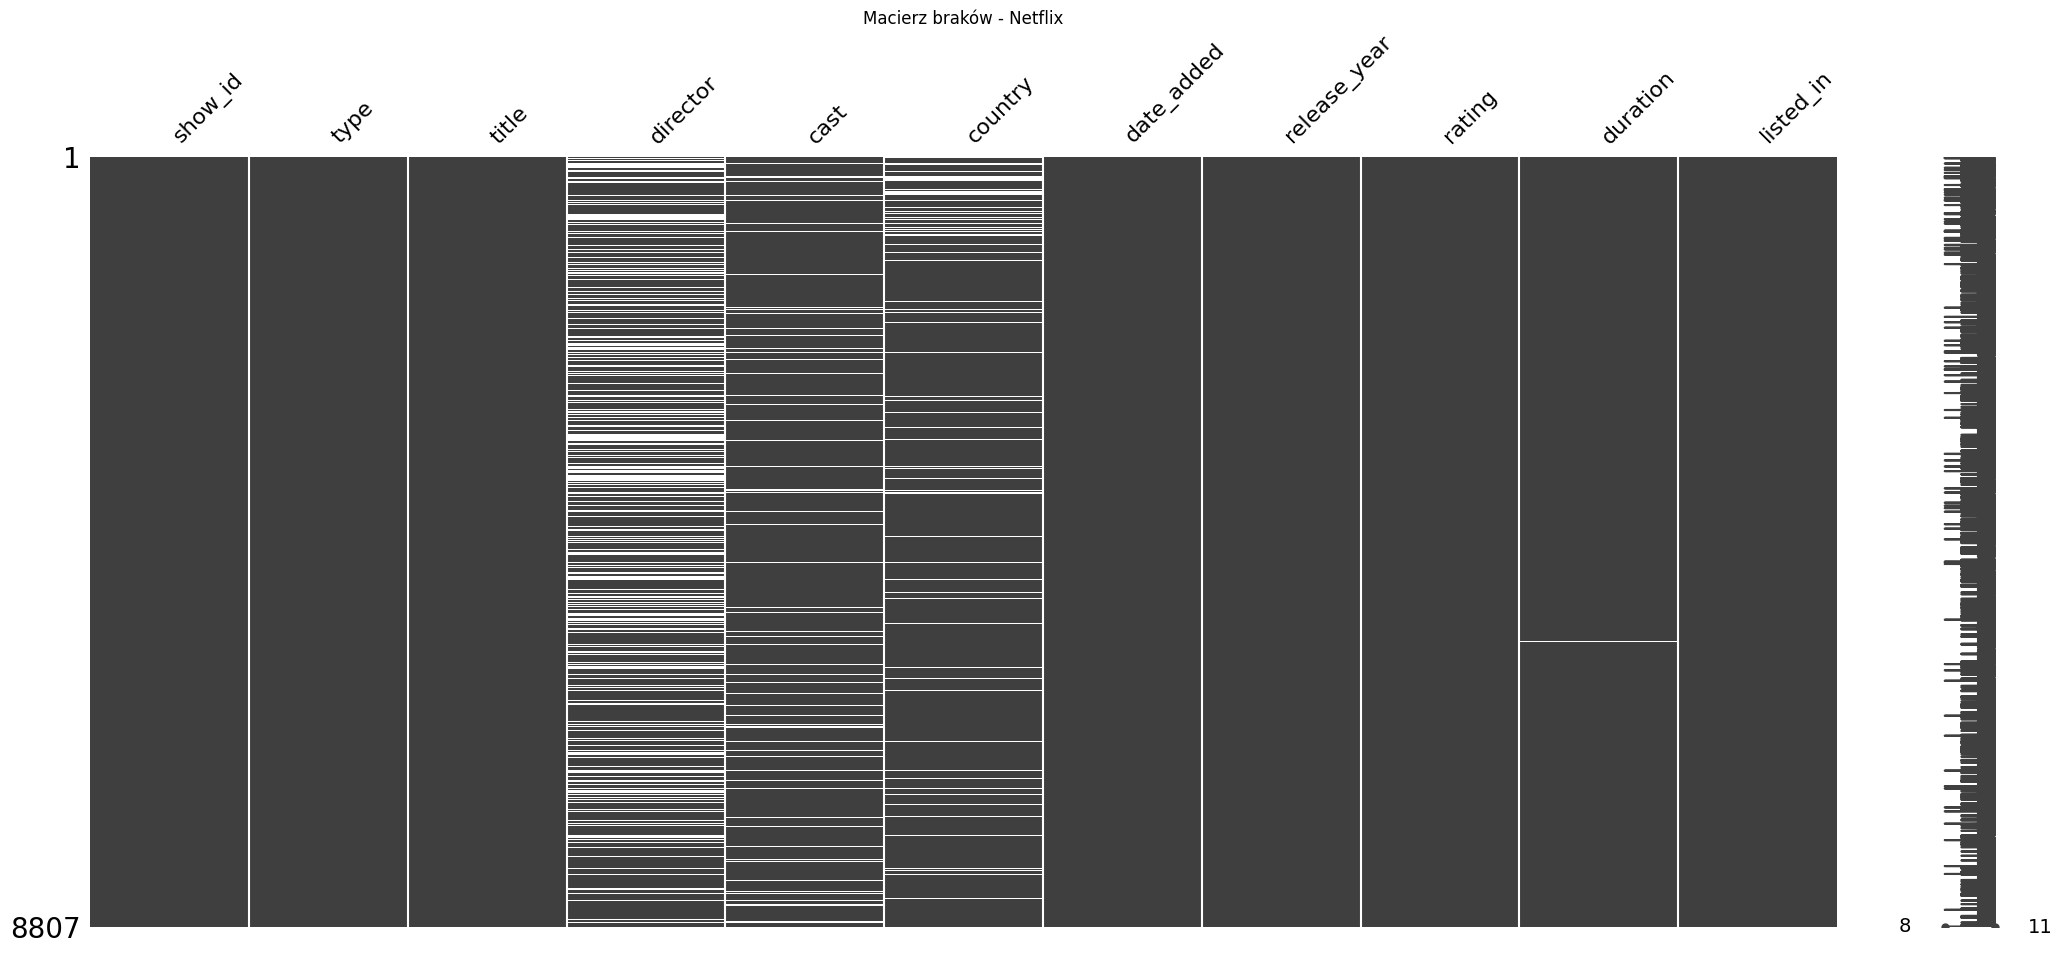

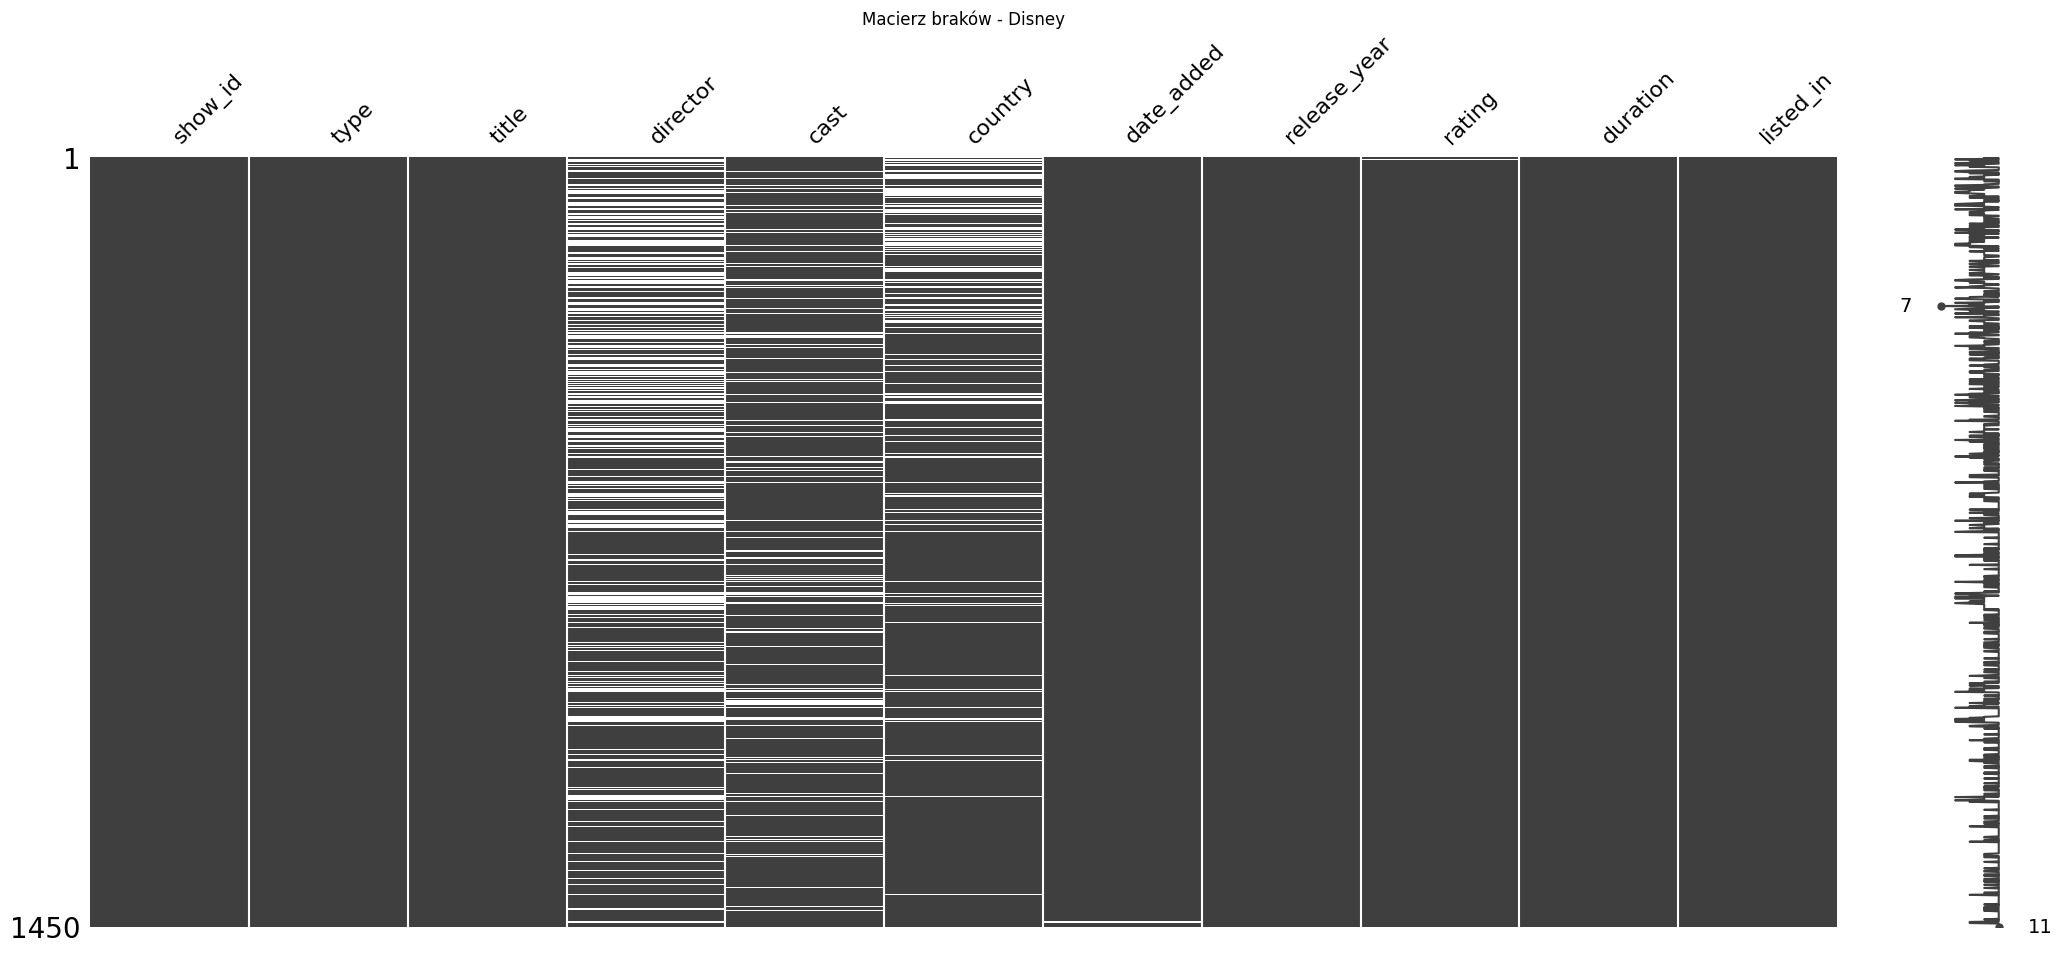

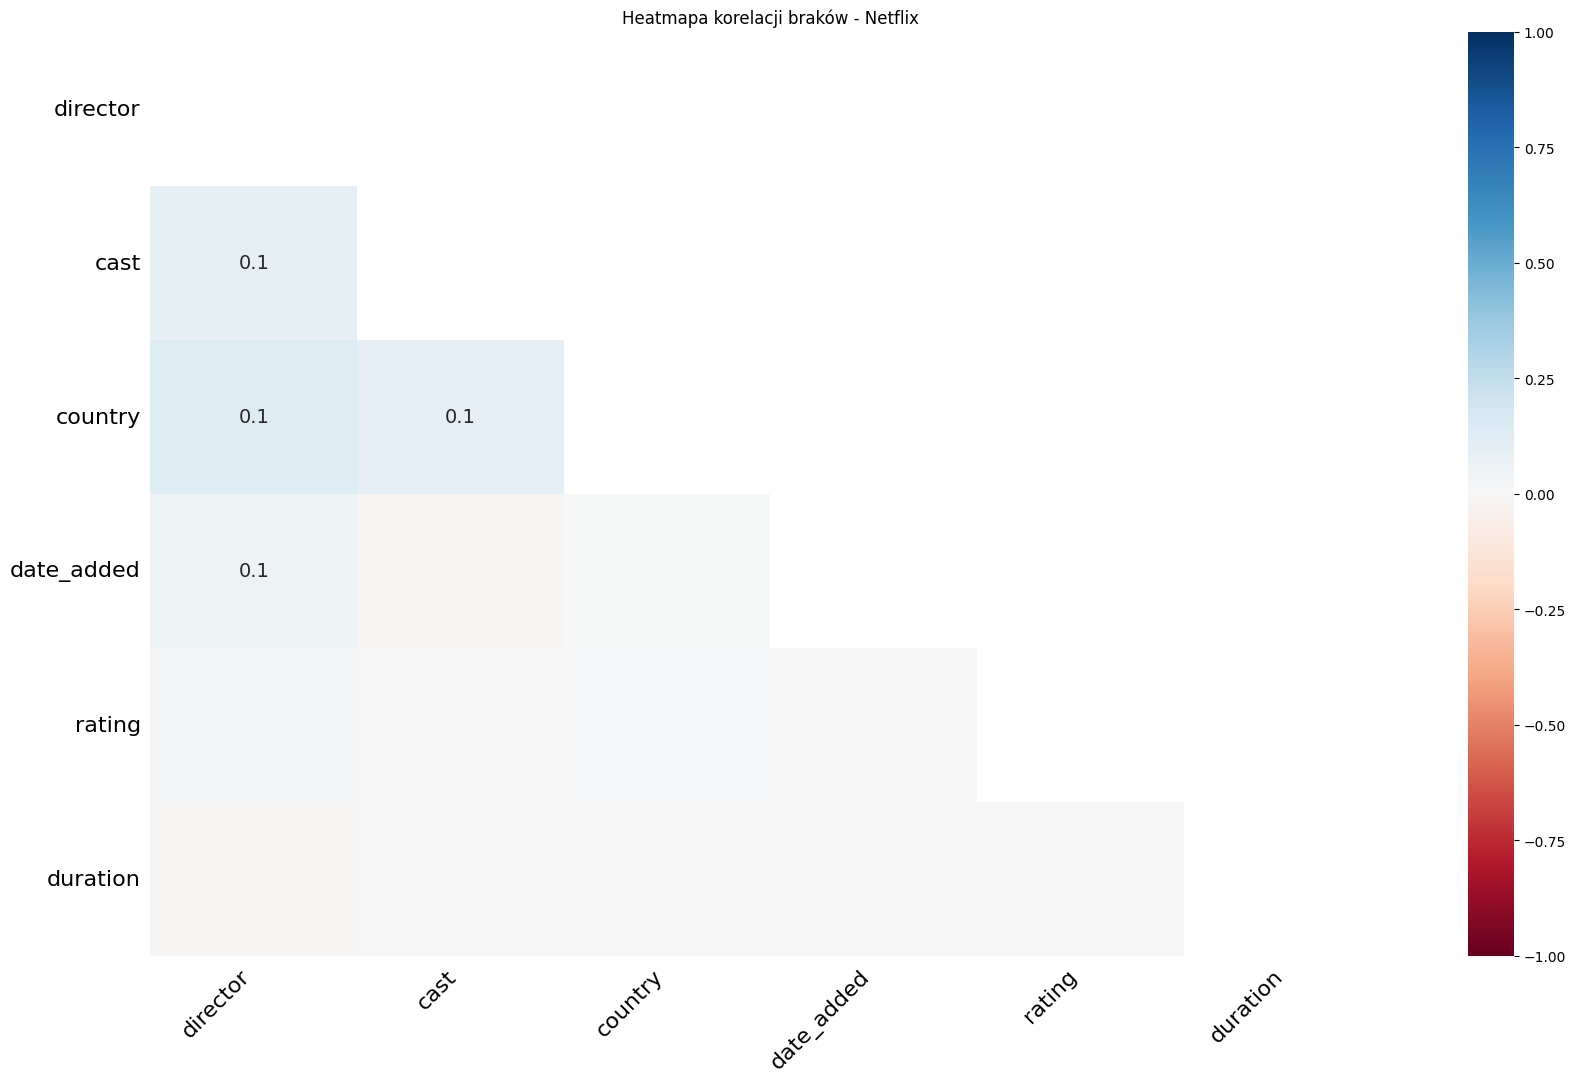

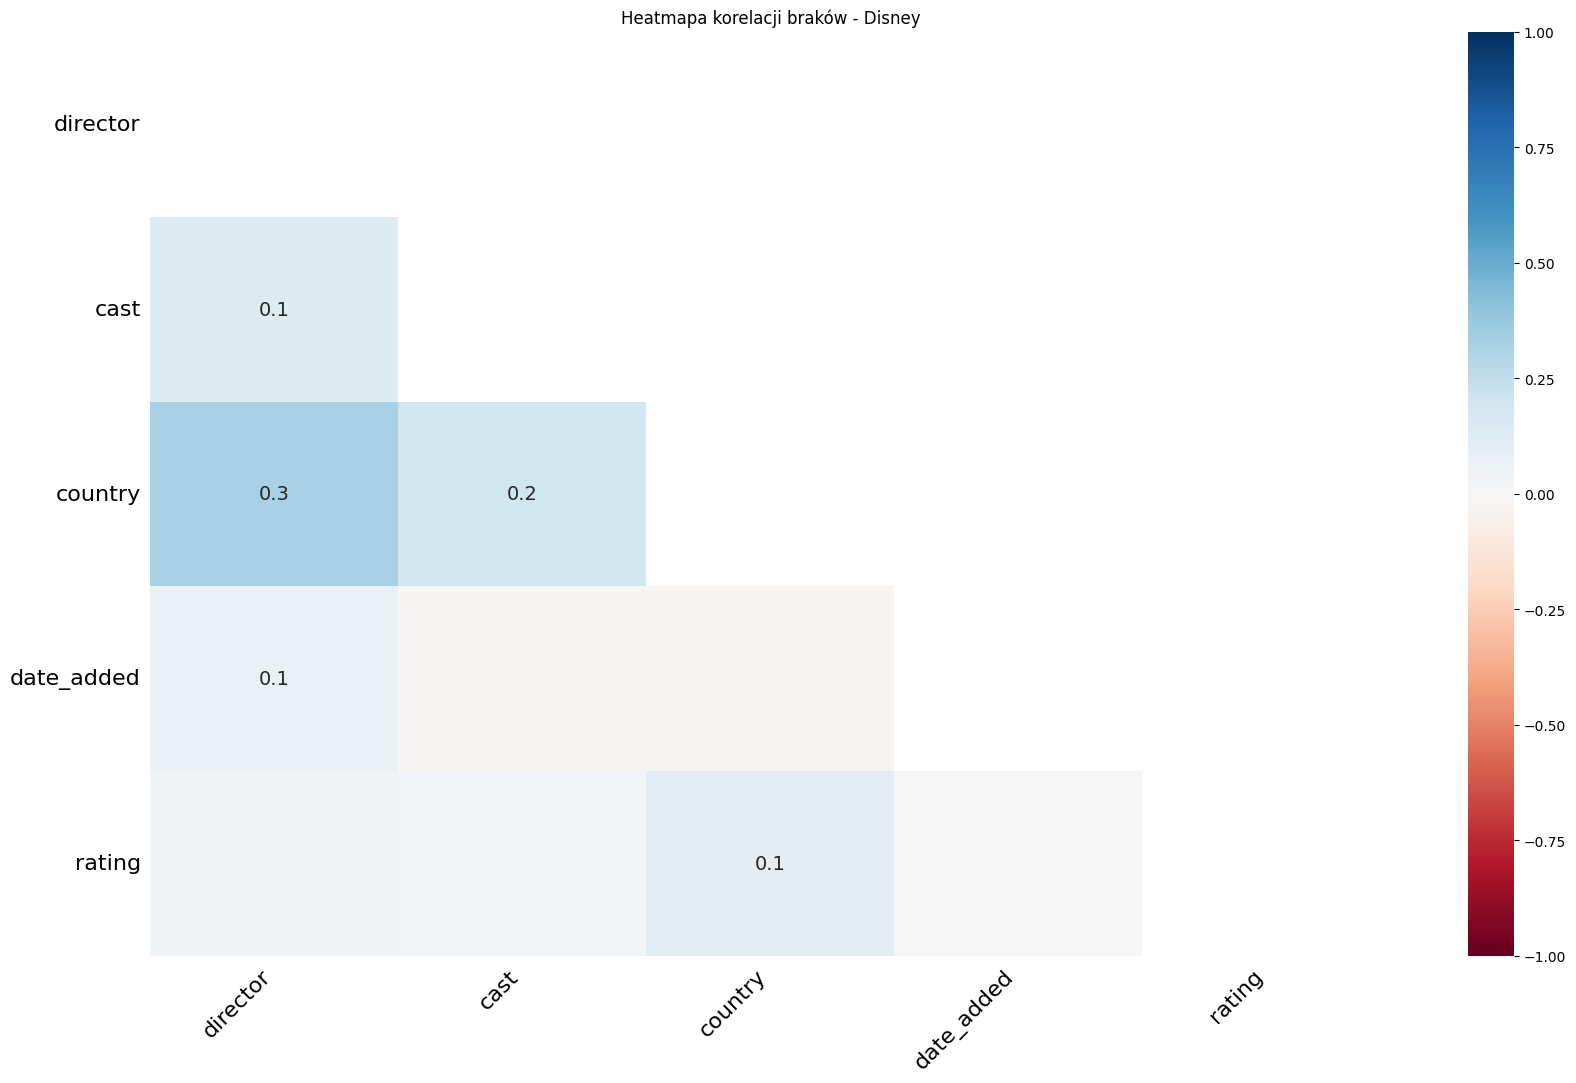

In [2]:
import missingno as msno

msno.matrix(netflix_ds)
plt.title('Macierz braków - Netflix')
print('Szczegółowe informacje na temat braków na platformie Netflix [%].')
missing_values = netflix_ds.isnull().sum()
total_rows = len(netflix_ds)
missing_percentages = (missing_values / total_rows) * 100
print(missing_percentages)

msno.matrix(disney_ds)
plt.title('Macierz braków - Disney')
print('Szczegółowe informacje na temat braków na platformie Disney [%].')
missing_values = disney_ds.isnull().sum()
total_rows = len(disney_ds)
missing_percentages = (missing_values / total_rows) * 100
print(missing_percentages)

msno.heatmap(netflix_ds)
plt.title('Heatmapa korelacji braków - Netflix')

msno.heatmap(disney_ds)
plt.title('Heatmapa korelacji braków - Disney')

## Wypełnienie brakujących danych

Na wykresach widać, że największy brak danych dotyczy kolumny director. Redukcja tej kolumny mogła by mieć duży, niepożądany wpływ na nasze dane. Lepszym rozwiązaniem jest wprowadzenie osobnej kategorii "Unknown" dzieki czemu nie tracimy obserwacji.


Dodatkowo, widać że w 10 % przypadków brakuje wartości country. Metodą jaką zastosowaliśmy, jest wypełnienie brakujących pól, najczęściej występującą wartością (modą).

Na wykresie ponizej widać, że pozbylismy sie kolumn, w ktorych wystepowala spora czesc brakujących danych.

<Axes: >

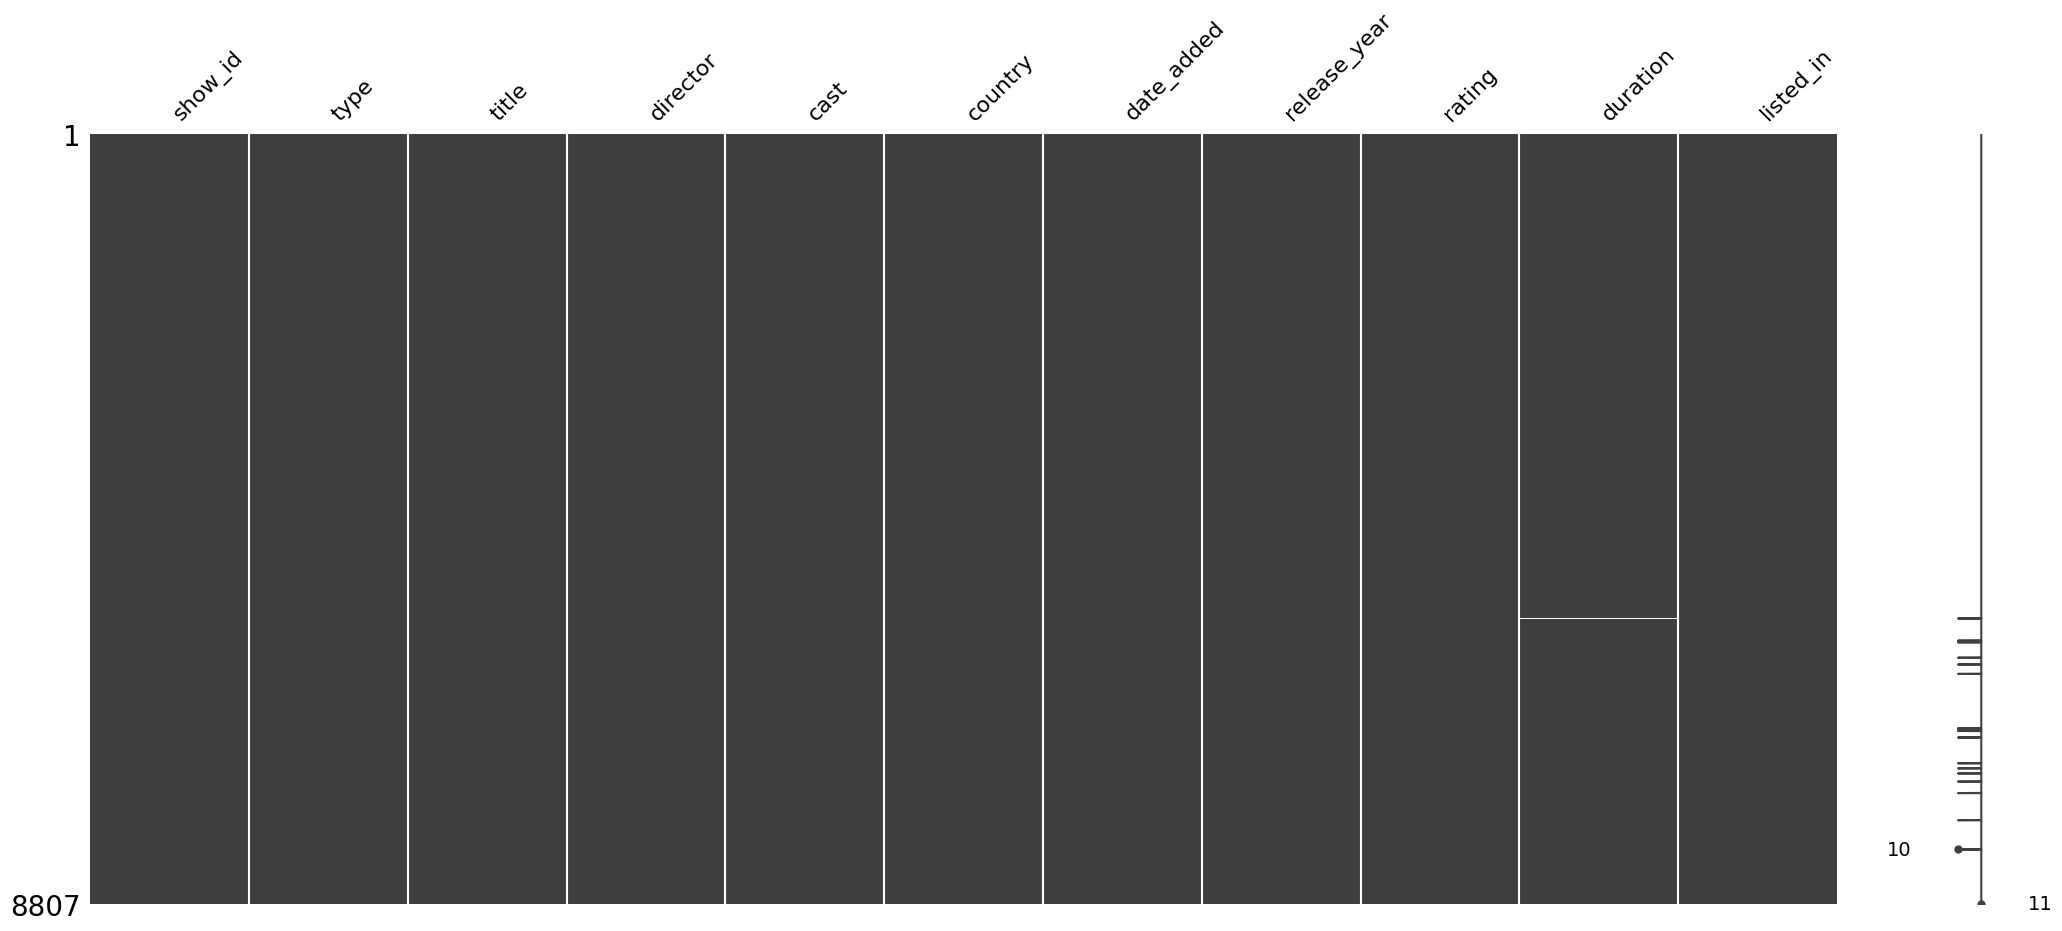

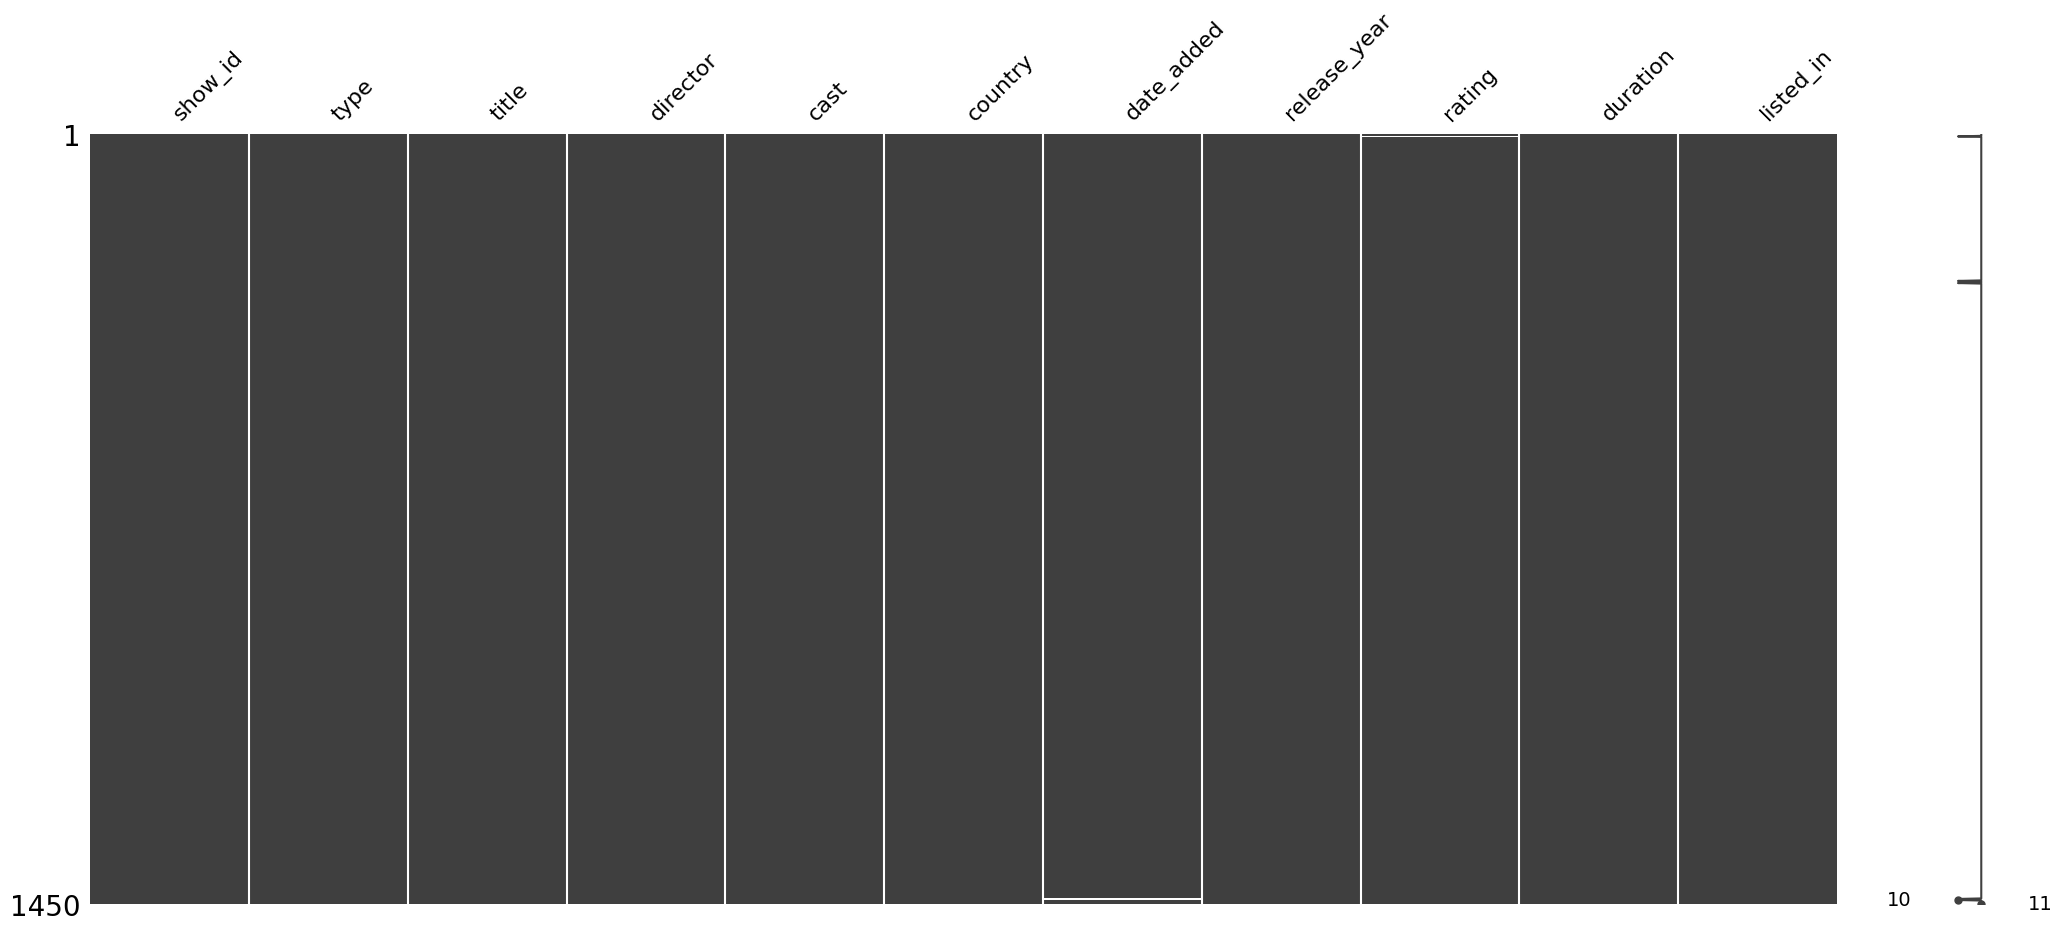

In [3]:
netflix_ds['director'] = netflix_ds['director'].fillna('Unknown')
netflix_ds['cast'] = netflix_ds['cast'].fillna('Unknown')

mode_country = netflix_ds['country'].mode()[0]
netflix_ds['country'] = netflix_ds['country'].fillna(mode_country)

msno.matrix(netflix_ds)

disney_ds['director'] = disney_ds['director'].fillna('Unknown')
disney_ds['cast'] = disney_ds['cast'].fillna('Unknown')

mode_country = disney_ds['country'].mode()[0]
disney_ds['country'] = disney_ds['country'].fillna(mode_country)

msno.matrix(disney_ds)


## Standaryzacja dat

In [4]:
# netflix_ds
netflix_ds['date_added'] = pd.to_datetime(netflix_ds['date_added'].str.strip(), errors='coerce')
netflix_ds['release_date'] = pd.to_numeric(netflix_ds['release_year'], errors='coerce')

disney_ds['date_added'] = pd.to_datetime(disney_ds['date_added'].str.strip(), errors='coerce')
disney_ds['release_date'] = pd.to_numeric(disney_ds['release_year'], errors='coerce')



## Weryfikacja poparwności danych

### Detekcja poprawności dat

W tej subsekcji, weryfikujemy czy date_added jest po release_year.
W przypadku kiedy warunek jest nie spełniony, logicznie zakładamy to za błąd w danych i pozbywamy się błędnych wierszy.

Dla wszystkich tak napotkanych sytuacji, nadpisujemy rok premiery, rokiem dodania contentu do platformy streamingowej. Tracimy w prawdzie realny rok prawdziwje premiery, ale zachowujemy spójność. Z racji ze takich rekordów jest niewiele, nie będzie to miało sporego wypływu na ogólny zarys danych.

In [5]:
netflix_ds['date_added'] = pd.to_datetime(netflix_ds['date_added'])
netflix_bad_dates = netflix_ds['release_year'] > netflix_ds['date_added'].dt.year

disney_ds['date_added'] = pd.to_datetime(disney_ds['date_added'])
disney_bad_dates = disney_ds['release_year'] > disney_ds['date_added'].dt.year

netflix_ds.loc[netflix_bad_dates, 'release_year'] = netflix_ds.loc[netflix_bad_dates, 'date_added'].dt.year
disney_ds.loc[disney_bad_dates, 'release_year'] = disney_ds.loc[disney_bad_dates, 'date_added'].dt.year

## Detekcja poprawności duration

W naszym datasecie, wystepuja filmy oraz seriale. Jak wiadomo, seriale mają swoje sezony, które są uwzględnione w kolumnie duration. Będzie miało to kluczowe znaczenie dla naszej wizualizacji, a więc rodzielmy te wartosci na 2 osobne kategorie.

Rekordy, które są typu TV Show, zawieraja w duration jednostkę "Season/Seasons", zaś filmy jednostkę "min." Na początek sprawdźmy, czy ta reguła jest obecna we wszystkich rekordanach naszego datasetu.

In [6]:
def validate_record_duration_units(dataset):
    tv_shows = dataset[dataset['type'] == 'TV Show']
    tv_mask = tv_shows['duration'].str.contains(r'\bSeasons?\b', na=False)
    tv_valid = tv_shows[tv_mask]
    tv_invalid = tv_shows[~tv_mask]

    print(f'TV Show – liczba rekordów ogółem: {len(tv_shows)}')
    print(f'  • Zawierające "Season"/"Seasons": {len(tv_valid)}')
    print(f'  • Bez słowa "Season"/"Seasons": {len(tv_invalid)}\n')

    movies = dataset[dataset['type'] == 'Movie']
    movie_mask = movies['duration'].str.contains(r'\bmin\b', na=False)
    movie_valid = movies[movie_mask]
    movie_invalid = movies[~movie_mask]

    print(f'Movie – liczba rekordów ogółem: {len(movies)}')
    print(f'  • Zawierające "min": {len(movie_valid)}')
    print(f'  • Bez słowa "min": {len(movie_invalid)}')

validate_record_duration_units(netflix_ds)
validate_record_duration_units(disney_ds)




TV Show – liczba rekordów ogółem: 2676
  • Zawierające "Season"/"Seasons": 2676
  • Bez słowa "Season"/"Seasons": 0

Movie – liczba rekordów ogółem: 6131
  • Zawierające "min": 6128
  • Bez słowa "min": 3
TV Show – liczba rekordów ogółem: 398
  • Zawierające "Season"/"Seasons": 398
  • Bez słowa "Season"/"Seasons": 0

Movie – liczba rekordów ogółem: 1052
  • Zawierające "min": 1052
  • Bez słowa "min": 0


Jak widać, mamy 3 filmy w bazie netflix, ktore nie spełniają tej reguły. Przyjrzyjmy się im.

In [7]:
movies = netflix_ds[netflix_ds['type'] == 'Movie']
movie_mask = movies['duration'].str.contains(r'\bmin\b', na=False)
movie_invalid = movies[~movie_mask]
movie_invalid

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,release_date
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,2017
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,2010
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,2015


Naprawmy te dane i przenieśmy je do rubryki duration. Dla brakujacych wartości rating, użyjmy najbardziej popularnej kategorii z datasetu.

In [8]:
bad_idx = movie_invalid.index
netflix_ds.loc[bad_idx, 'duration'] = netflix_ds.loc[bad_idx, 'rating']
netflix_ds.loc[bad_idx, 'rating'] = pd.NA
mode_rating = netflix_ds['rating'].mode()[0]
netflix_ds['rating'] = netflix_ds['rating'].fillna(mode_rating)

print(netflix_ds.loc[bad_idx, ['show_id','duration','rating']])

     show_id duration rating
5541   s5542   74 min  TV-MA
5794   s5795   84 min  TV-MA
5813   s5814   66 min  TV-MA


Teraz stwórzmy 2 osobne kolumny, dedykowane dla seriali oraz filmów, aby móc zwizualizować długość odcinków.

In [9]:
netflix_ds['runtime_min'] = (
    netflix_ds['duration']
      .str.extract(r'(\d+)', expand=False)
      .astype(float)
      .where(netflix_ds['type'] == 'Movie')
)

netflix_ds['num_seasons'] = (
    netflix_ds['duration']
      .str.extract(r'(\d+)', expand=False)
      .astype(float)
      .where(netflix_ds['type'] == 'TV Show')
)

disney_ds['runtime_min'] = (
    disney_ds['duration']
      .str.extract(r'(\d+)', expand=False)
      .astype(float)
      .where(disney_ds['type'] == 'Movie')
)

disney_ds['num_seasons'] = (
    disney_ds['duration']
      .str.extract(r'(\d+)', expand=False)
      .astype(float)
      .where(disney_ds['type'] == 'TV Show')
)

netflix_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  release_date  8807 non-null   int64         
 12  runtime_min   6131 non-null   float64       
 13  num_seasons   2676 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 963.4+ KB


# Wizualizacje

## 1. Wykres top 10 kategorii na platformach

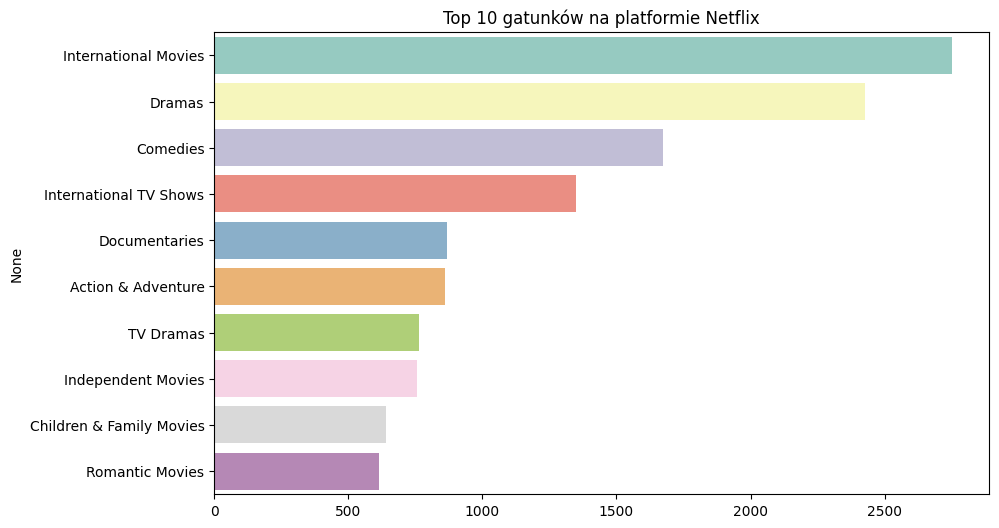

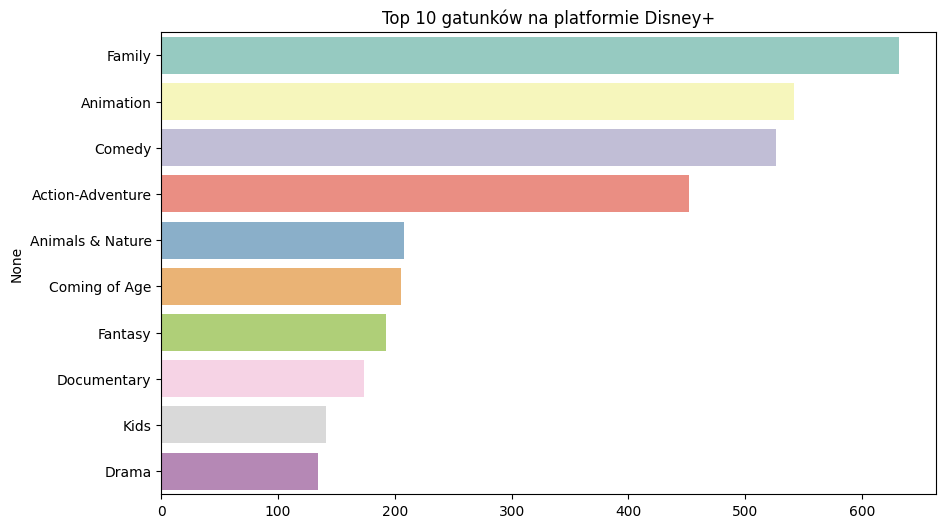

In [10]:
def generate_most_popular_types(dataset, label: str):
  genres_dummies = dataset['listed_in'].str.get_dummies(sep=', ')

  genre_counts = genres_dummies.sum().sort_values(ascending=False).head(10)
  plt.figure(figsize=(10, 6))
  sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, palette='Set3', legend=False)
  plt.title('Top 10 gatunków na platformie '+label)
  plt.show()

generate_most_popular_types(netflix_ds, 'Netflix')
generate_most_popular_types(disney_ds, 'Disney+')


## 2. Wykres liczby produkcji w czasie według platformy

### Netflix
Wykres przedstawia liczbę filmów i seriali w poszczególnych latach wydania na platformie Netflix. Po 2015 roku widać duży wzrost produkcji.

### Disney+
Wykres przedstawia liczbę filmów i seriali w poszczególnych latach wydania na platformie Disney+. Disney+ wyraźnie ma większe archiwum starszych produkcji.

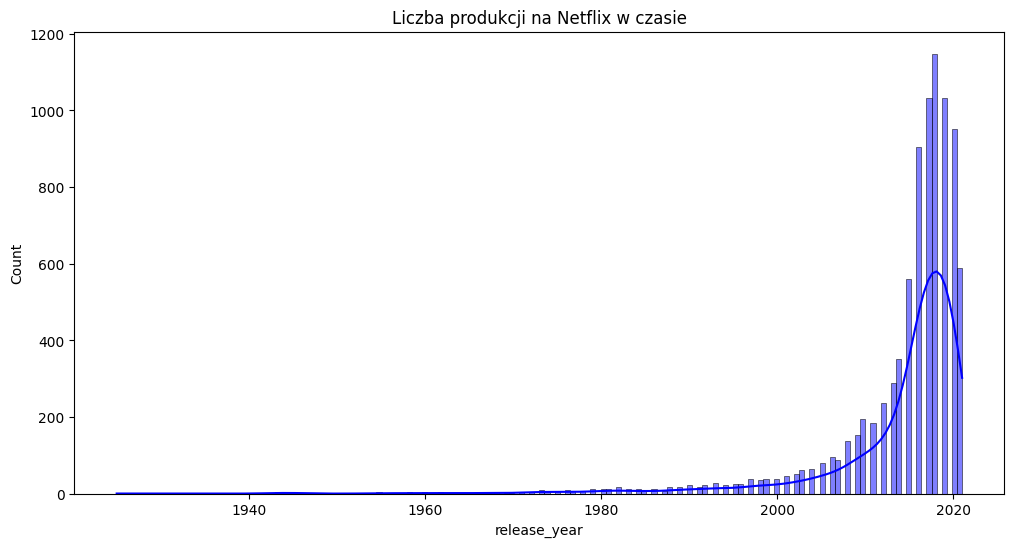

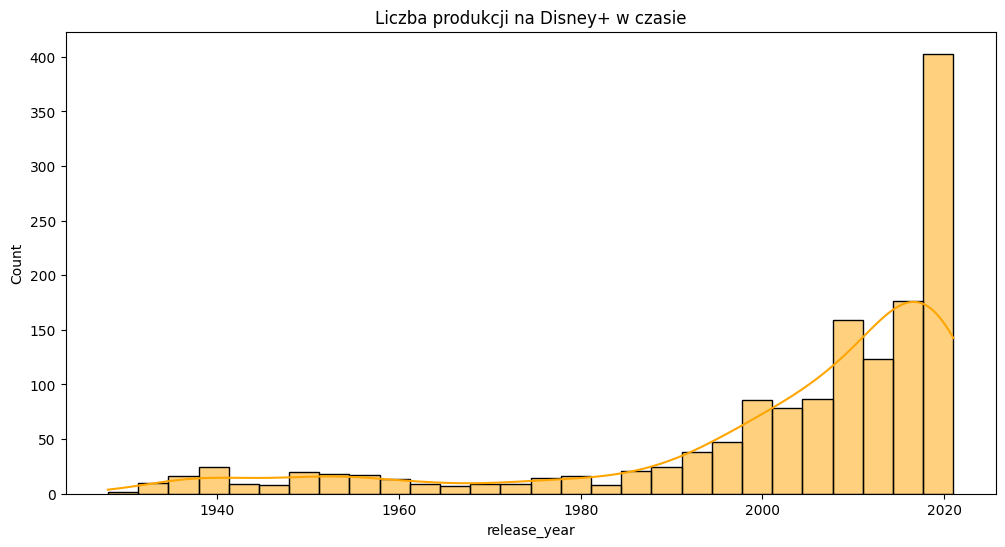

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(netflix_ds['release_year'], kde=True, color='blue')
plt.title('Liczba produkcji na Netflix w czasie')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(disney_ds['release_year'], kde=True, color='orange')
plt.title('Liczba produkcji na Disney+ w czasie')
plt.show()


## 3. Wykres rozkładu kategorii wiekowych według platformy

### LEGENDA (WYKRES Z ROZKŁADEM KATEGORII WIEKOWYCH)
Te skróty to oficjalne klasyfikacje wiekowe, które informują widzów, od jakiego wieku dana treść jest odpowiednia. Oto najczęstsze z nich:

*   G (General Audiences) – odpowiednie dla wszystkich widzów, brak treści nieodpowiednich.
*   PG (Parental Guidance) – treści dla dzieci z zaleceniem opieki rodzicielskiej.
*   PG-13 (Parents Strongly Cautioned) – niektóre treści mogą być nieodpowiednie dla dzieci poniżej 13 lat.
*   TV-Y – odpowiednie dla wszystkich dzieci.
*   TV-Y7 – odpowiednie dla dzieci od 7 lat.
*   TV-G – odpowiednie dla wszystkich grup wiekowych (podobne do G, ale dla telewizji).
*   TV-G – odpowiednie dla wszystkich grup wiekowych (podobne do G, ale dla telewizji).
*   TV-14 – treści dla osób powyżej 14 lat.

### Opis
Na obu wykresach widzimy rozkład kategorii wiekowych na platforamch. W przypadku Netflixa, widać że skupiają się na starszej audiencji, zaś u Disneya dominuja produkcje dla młodszych.



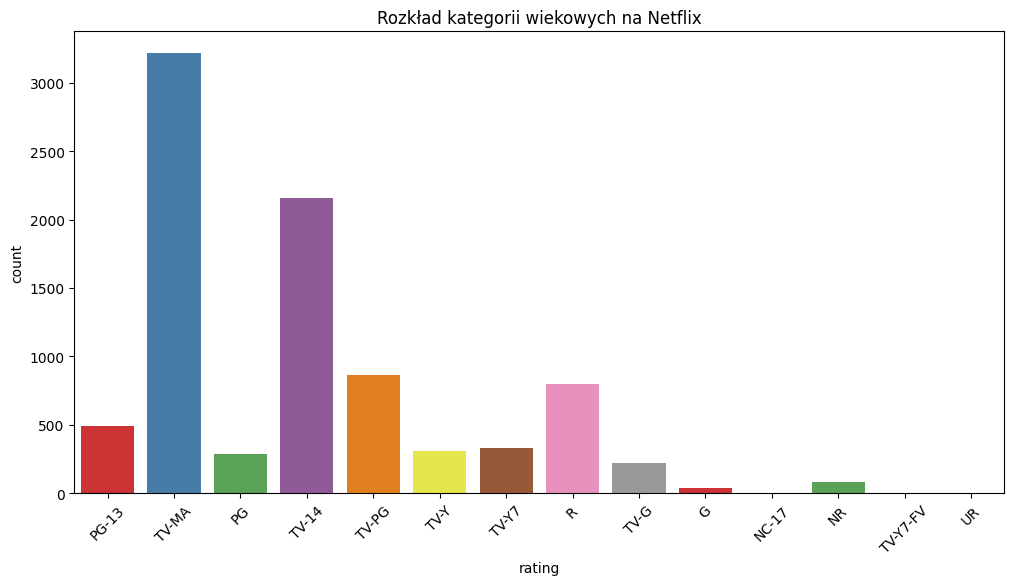

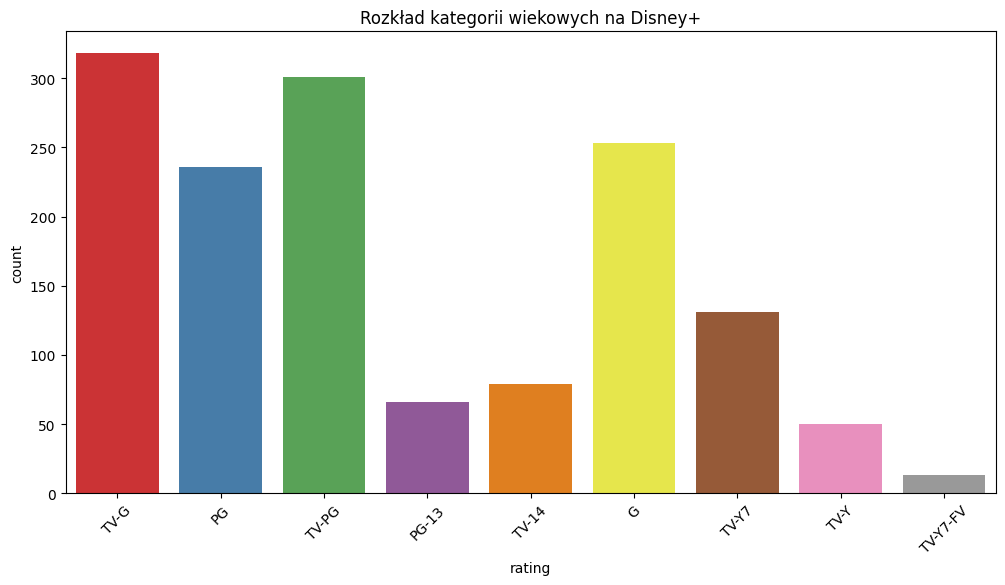

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_ds, x='rating', hue='rating', palette='Set1', legend=False)
plt.title('Rozkład kategorii wiekowych na Netflix')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=disney_ds, x='rating', hue='rating', palette='Set1', legend=False)
plt.title('Rozkład kategorii wiekowych na Disney+')
plt.xticks(rotation=45)
plt.show()

# 4. Wykres długosci filmów w minutach i sezonów seriali, do roku wydania

Oba wykresy przdstawiają, w jaki sposób zmieniała się długość filmów liczona w minutach oraz długość seriali liczona w ilości sezonów - w czasie.

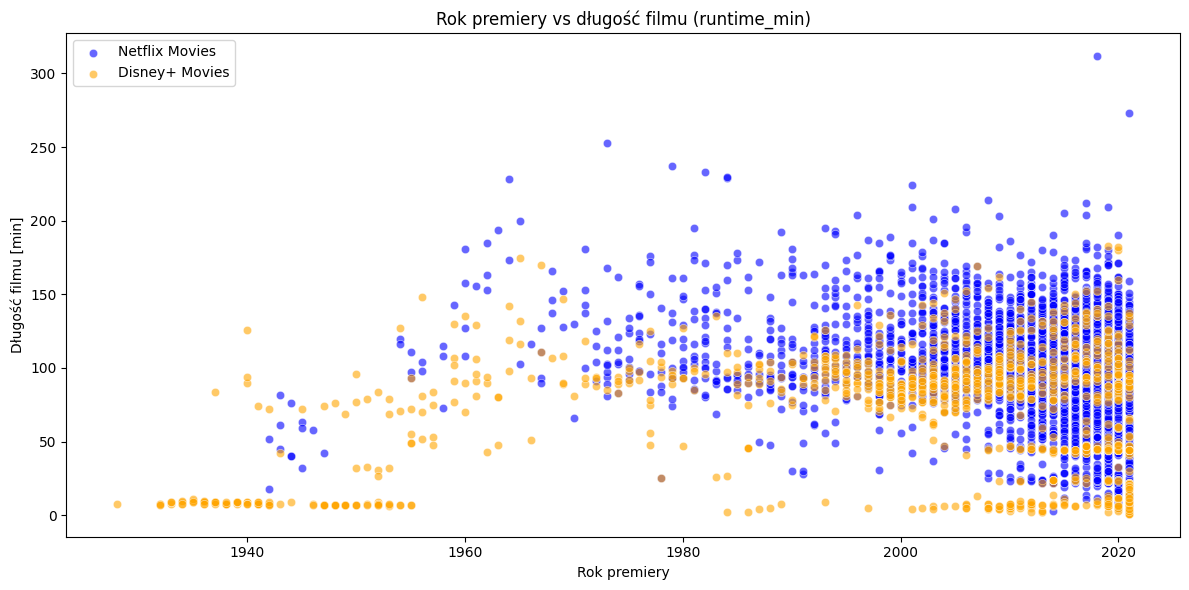

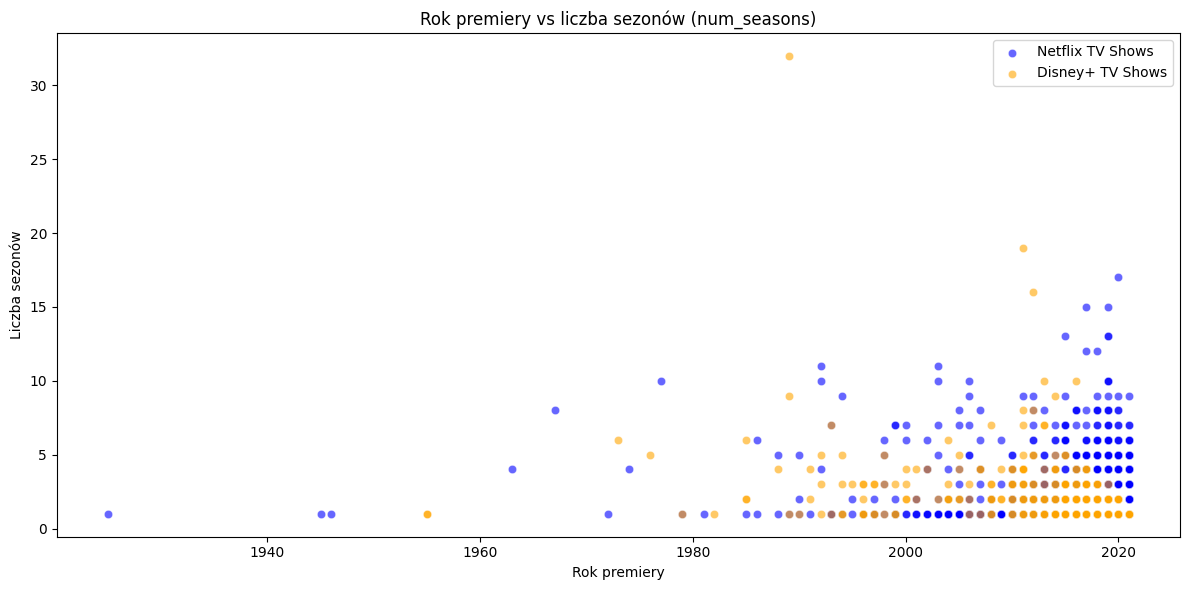

In [13]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=netflix_ds,
    x='release_year',
    y='runtime_min',
    color='blue',
    label='Netflix Movies',
    alpha=0.6
)
sns.scatterplot(
    data=disney_ds,
    x='release_year',
    y='runtime_min',
    color='orange',
    label='Disney+ Movies',
    alpha=0.6
)
plt.title('Rok premiery vs długość filmu (runtime_min)')
plt.xlabel('Rok premiery')
plt.ylabel('Długość filmu [min]')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=netflix_ds,
    x='release_year',
    y='num_seasons',
    color='blue',
    label='Netflix TV Shows',
    alpha=0.6
)
sns.scatterplot(
    data=disney_ds,
    x='release_year',
    y='num_seasons',
    color='orange',
    label='Disney+ TV Shows',
    alpha=0.6
)
plt.title('Rok premiery vs liczba sezonów (num_seasons)')
plt.xlabel('Rok premiery')
plt.ylabel('Liczba sezonów')
plt.legend()
plt.tight_layout()
plt.show()

# Analiza opisowa

## Jakie gatunki dominują?

Odpowiedzią na to pytanie są wykresy przedstawione w sekcji "Wizualizacje", pkt 1.

Na platformie Netflix dominują kategorie: International Movies, Dramas, Comedies, TV Shows, Documentaries. Natomiast, na platformie Disney+ przeważają kategorie: Family, Animation, Comedy, Action-Adventure, Animals and nature.

Platforma Netflix oferuje dużą różnorodność – interpretujemy ją jako próbę dotarcia do wielu grup demograficznych.

Disney+ proponuje ofertę bardzo rodzinną i bezpieczną, skierowaną bardziej do młodszych odbiorców. Konsekwencją jest mniej niszowych gatunków, więcej typowych treści dziecięcych oraz klasyków familijnych.

## Czy na platformach dominuja stare czy nowe produkcje?

Odpwoiedź zawarta jest na wykresach przedstawionych w sekcji "Wizualizacje", pkt 2. Skale osi Y obu wykresów pozwalają na wnioskowanie, że Netflix zasila swoją bazę produkcji zdecydowanie nowszymi materiałami. Znaczący wzrost liczby produkcji zauważalny jest po 2015 roku — szczyt około 2018–2020. Dane te pokazują dynamiczną ekspansję firmy.

Disney+ oferuje więcej starszych produkcji – sięgających nawet lat 30. XX wieku. Widoczny wzrost po 2000 roku, ale największy przyrost następuje po 2019 (rok premiery platformy Disney+). Disney posiada zasobne archiwum, z którego korzysta na potrzeby swojej platformy.

Podsumowując, Netflix stawia na nowoczesne, masowo produkowane treści, zaś Disney+ to archiwalna biblioteka oraz względnie mniejsza skala produkcji nowych treści.

## Jaki jest rozkład treści, w podziale na kategorie wiekowe?

Dane wyjaśniające odpowiedź na pytanie zawarte są na wykresach przedstawionych w sekcji "Wizualizacje", pkt 4.

Netflix posiada najwięcej treści w kategoriach TV-MA, R, TV-14 – treści dla dorosłych i młodzieży. Występuje szeroka rozpiętość kategorii - od treści dla dzieci po 18+.

Na Disney+ zdecydowana dominacja ocen TV-G, PG, G, TV-PG, czyli od treści dziecięcych po treści dla starszych dzieci, pod nadzorem rodziców. Ograniczona liczba treści dla starszych widzów (PG-13, TV-14).


# Wnioski

Po przeprowadzeniu naszej analizy, można zauważyć że platforma Netflix, skupia się głównie na produkcjach dla osób starszych. Ma dużo większa baze filmów co daje nam większy wybór w doborze treści. Dodatkowo, po wewnętrznych konsultacjach zespołu, możemy stwierdzić że dominujące gatunki materiałów, pasują do naszych preferencji. Z drugiej strony, Disney posiada bardzo bogatą baze dla dzieci, młodzierzy i rodzin. Jest idealnym wyborem dla każdej rodziny z dziećmi.

Dane które użyliśmy w naszej analizie, są ograniczone do 2020 roku, więc obecna sytuacja na rynku streamingowym może sie nieco różnić co wpływa na ograniczenia w naszej analizie.

W nastepnej iteracji naszej analizy, możemy uwzględnić również inen platformy, dla szerszego oglądu na sytuacje na rynku.